#### B6. Use non-parametric K-Nearest Neighbor (KNN) techniques to classify grayscale images of shapes (e.g., circles, squares, and triangles). Evaluate and compare the classification accuracy of both methods. 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KernelDensity

In [25]:
def generate_shape(shape, size=64):
    img = np.zeros((size, size), dtype=np.uint8)
    center = (size // 2, size // 2)
    if shape == "circle":
        cv2.circle(img, center, size // 3, 255, -1)
    elif shape == "square":
        cv2.rectangle(img, (size//4, size//4), (3*size//4, 3*size//4), 255, -1)
    elif shape == "triangle":
        pts = np.array([[size//2, size//5], [size//5, 4*size//5], [4*size//5, 4*size//5]], np.int32)
        cv2.fillPoly(img, [pts], 255)
    return img

In [26]:
def create_dataset(num_samples=100):
    shapes = ["circle", "square", "triangle"]
    X, y = [], []
    for i, shape in enumerate(shapes):
        for _ in range(num_samples):
            img = generate_shape(shape)
            X.append(img.flatten())
            y.append(i)
    return np.array(X), np.array(y), shapes

print("Generating dataset...")
X, y, shapes = create_dataset(300)

Generating dataset...


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print(f"K-NN Accuracy: {knn_acc:.2f}")

K-NN Accuracy: 1.00


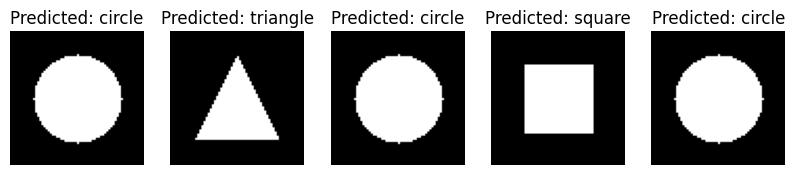

In [31]:
plt.figure(figsize=(10, 2))  # Set figure size once before the loop

for i in range(5):
    plt.subplot(1, 5, i + 1)  # (rows=1, cols=5, position=i+1)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title("Predicted: " + shapes[y_pred[i]])
    plt.axis('off')

plt.show()

In [33]:
# OPTIONAL
parzen_kde = []
bandwidth = 0.1
for i in range(3):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(X_train[y_train == i])
    parzen_kde.append(kde)

In [34]:
def parzen_predict(X):
    scores = np.array([kde.score_samples(X) for kde in parzen_kde]).T
    return np.argmax(scores, axis=1)

y_pred_parzen = parzen_predict(X_test)
parzen_acc = accuracy_score(y_test, y_pred_parzen)
print(f"Parzen-Window Accuracy: {parzen_acc:.2f}")

Parzen-Window Accuracy: 1.00


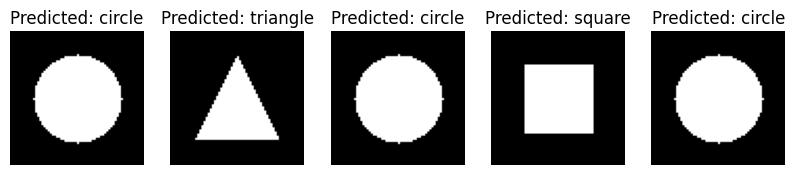

In [35]:
plt.figure(figsize=(10, 2))  # Set figure size once before the loop

for i in range(5):
    plt.subplot(1, 5, i + 1)  # (rows=1, cols=5, position=i+1)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title("Predicted: " + shapes[y_pred_parzen[i]])
    plt.axis('off')

plt.show()